# Unsupervised Learning Team 5 Solution (Gabe)

© Explore Data Science Academy

---
### Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

<img src="https://i.pinimg.com/originals/d9/58/5e/d9585efc140b5d3689b3341aa5c35df1.jpg" alt="movie-recommendation" style="width: 800px;"/>







Our team has been challenged with constructing a movie recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

<a id="cont"></a>

## Table of Contents

<a href=#one>(i) Comet Experiment</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data and Data Descriptions</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## (i) Comet Experiment
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we conduct our Comet Experiment. |

---

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np

# Kaggle requirements
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


#word cloud
%matplotlib inline
import wordcloud

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
sns.set()


'''
# ML Models
!pip install scikit surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ML Pre processing
from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hyperparameter tuning
from surprise.model_selection import GridSearchCV
'''

# High performance hyperparameter tuning
#from tune_sklearn import TuneSearchCV

# Remove warnings 
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data and Data Descriptions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data and data descriptions⚡ |
| :--------------------------- |
| In this section we load the data from the CSV files into a DataFrame. We also descripe the various csv files|

---

In [29]:
# read in all csv files (kaggle)
'''
train = pd.read_csv('../input/edsa-movie-recommendation-wilderness/train.csv')
test = pd.read_csv('../input/edsa-movie-recommendation-wilderness/test.csv')
genome_scores = pd.read_csv('../input/edsa-movie-recommendation-wilderness/genome_scores.csv')
genome_tags = pd.read_csv('../input/edsa-movie-recommendation-wilderness/genome_tags.csv')
imdb_data = pd.read_csv('../input/edsa-movie-recommendation-wilderness/imdb_data.csv')
links = pd.read_csv('../input/edsa-movie-recommendation-wilderness/links.csv')
movies = pd.read_csv('../input/edsa-movie-recommendation-wilderness/movies.csv')
tags = pd.read_csv('../input/edsa-movie-recommendation-wilderness/tags.csv')
'''

"\ntrain = pd.read_csv('../input/edsa-movie-recommendation-wilderness/train.csv')\ntest = pd.read_csv('../input/edsa-movie-recommendation-wilderness/test.csv')\ngenome_scores = pd.read_csv('../input/edsa-movie-recommendation-wilderness/genome_scores.csv')\ngenome_tags = pd.read_csv('../input/edsa-movie-recommendation-wilderness/genome_tags.csv')\nimdb_data = pd.read_csv('../input/edsa-movie-recommendation-wilderness/imdb_data.csv')\nlinks = pd.read_csv('../input/edsa-movie-recommendation-wilderness/links.csv')\nmovies = pd.read_csv('../input/edsa-movie-recommendation-wilderness/movies.csv')\ntags = pd.read_csv('../input/edsa-movie-recommendation-wilderness/tags.csv')\n"

In [5]:
# read in all csv files (offline notebook)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb_data = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

#### Dataset Descriptions
The supplied dataset comprises the following:

1. genome_scores.csv - A score mapping the strength between movies and tag-related properties
2. train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data
3. test.csv - The test split of the dataset. Contains user and movie IDs with no rating data
3. tags.csv - User assigned for the movies within the dataset
3. links.csv - File providing a mapping between a movie ID, IMDB IDs and TMDB IDs
4. movies - File providing details about the title of the movie, genres and movieID that further can be used 5. to merge to other related dataset
6. imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file
7. genome_tags.csv - User assigned tags for genome-related scores

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we perform an in-depth analysis of all the variables in the various dataFrames. |

---


Let's first take a look at the shape of all the datasets in order to have a general overview.

In [6]:
# Declaring a list that contains the names of the dataframes
dfs = [train, test, genome_scores, genome_tags, imdb_data, links, movies, tags]
# Create a list of the names of the imported datasets
df_names = ['train', 'test', 'genome_scores', 'genome_tags',
            'imdb_data', 'links', 'movies', 'tags']
dfs_dict = {}  # declaring an empty dictionary
for name, data in zip(df_names, dfs):  # iterate over the list and dictionary
    dfs_dict[name] = [data.shape[0], data.shape[1]]
    df_prop = pd.DataFrame(dfs_dict,
                          index=['rows', 'columns']).transpose()
df_properties = df_prop.sort_values(by='rows', ascending=False)

df_properties  # view the final output

,rows,columns
genome_scores,15584448,3
train,10000038,4
test,5000019,2
tags,1093360,4
links,62423,3
movies,62423,3
imdb_data,27278,6
genome_tags,1128,2


#### Viewing of data and missing values 

Let's take a quick 'sneak peek' and some basic information at each of the datasets provided. 

In [7]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
print('INFO OF DATASET')
train.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
train.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
    ----------------
MISSING VALUES OF DATASET


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
print('INFO OF DATASET')
test.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
test.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
    ----------------
MISSING VALUES OF DATASET


userId     0
movieId    0
dtype: int64

In [11]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [12]:
print('INFO OF DATASET')
genome_scores.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
genome_scores.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
    ----------------
MISSING VALUES OF DATASET


movieId      0
tagId        0
relevance    0
dtype: int64

In [13]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [14]:
print('INFO OF DATASET')
genome_tags.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
genome_tags.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
    ----------------
MISSING VALUES OF DATASET


tagId    0
tag      0
dtype: int64

In [15]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [16]:
print('INFO OF DATASET')
imdb_data.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
imdb_data.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
    ----------------
MISSING VALUES OF DATASET


movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

We clearly see a number of missing data for each of the columns. Let's allow for a more visual representation of the missing data below...

<AxesSubplot:>

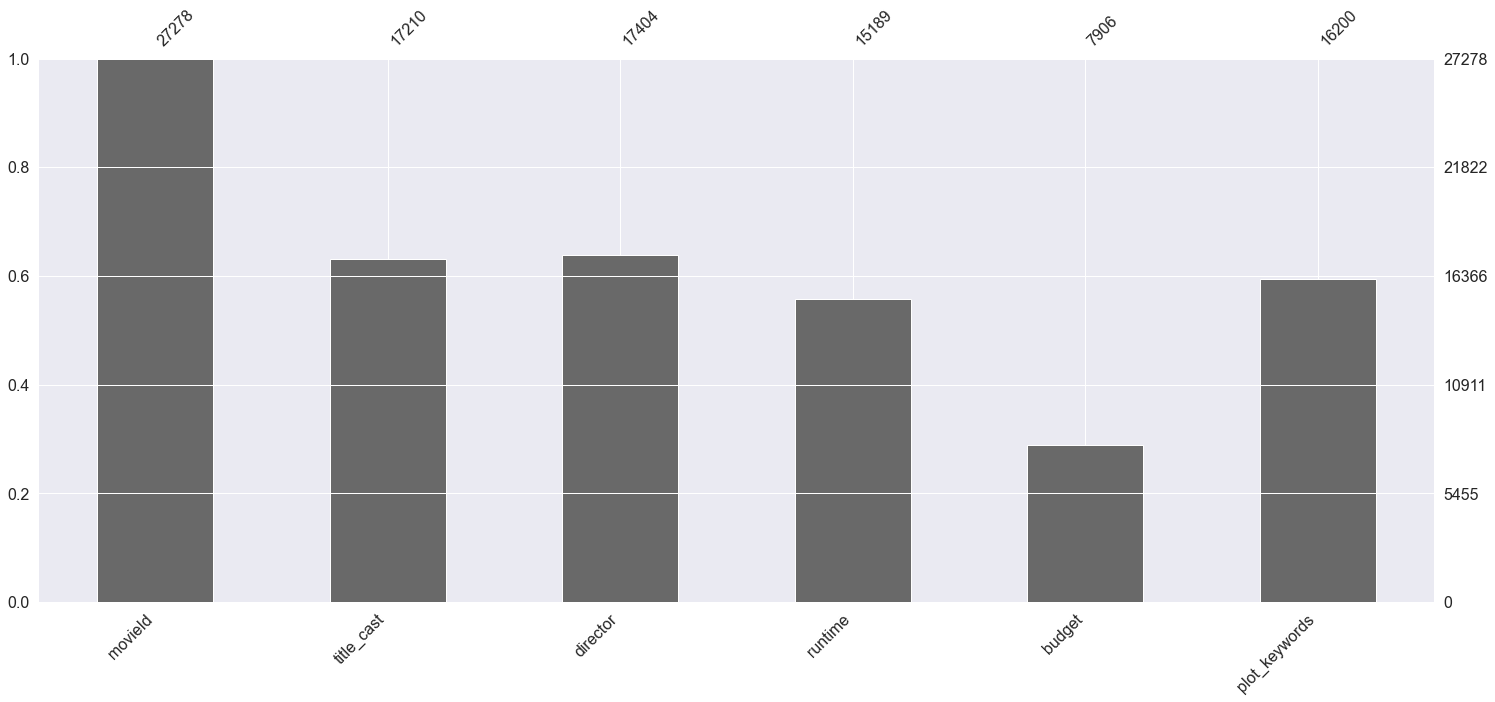

In [17]:
import missingno as msno

# plot bar chart of the missing values
msno.bar(imdb_data)

The bar graph above gives a clear visual representation of the extent of missing data for each column. It should be noted that for the 'Budget' column, more than half the data is missing. If need be, we'll look to address all these issues at a later stage. For now, let's take a look at the distribution of the missing data below.. 

<AxesSubplot:>

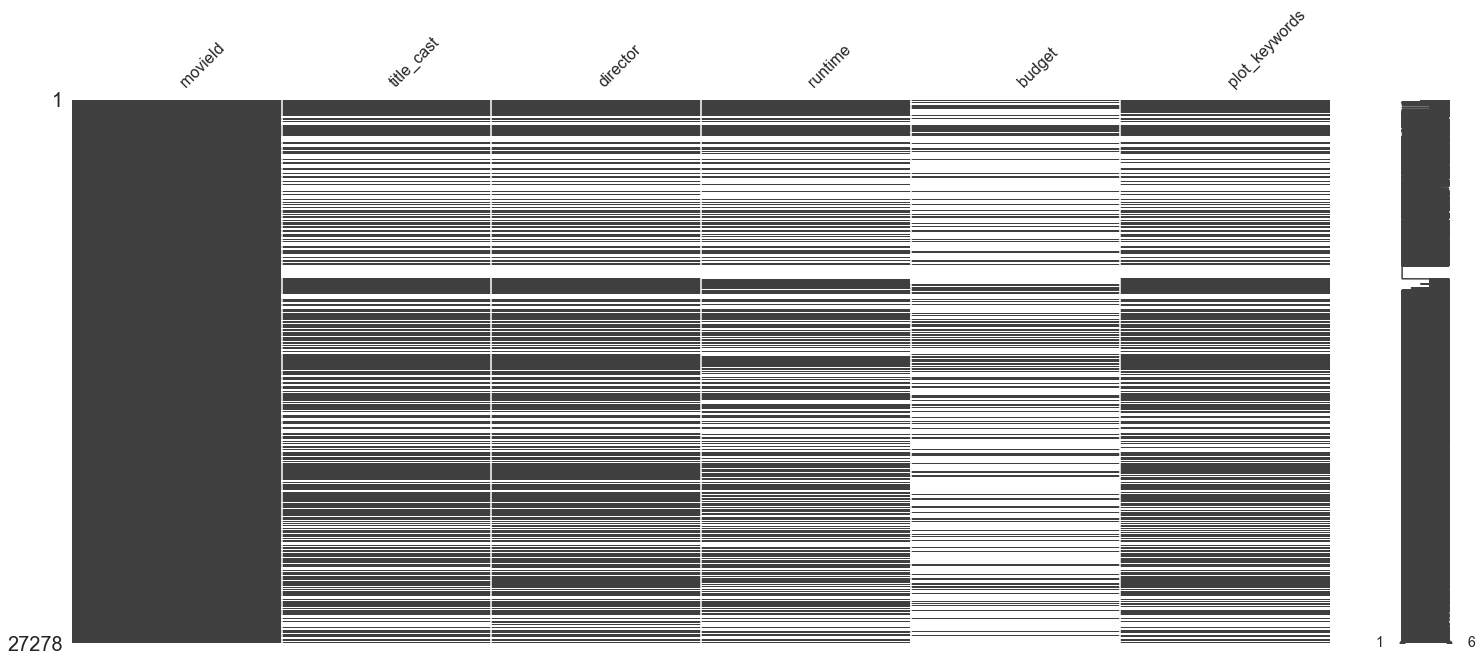

In [18]:
# plot a matrix of the missing data 
msno.matrix(imdb_data)

We see that the missing data is quite evenly distributed across the various columns. 

In [19]:
links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [20]:
print('INFO OF DATASET')
links.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
links.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
    ----------------
MISSING VALUES OF DATASET


movieId      0
imdbId       0
tmdbId     107
dtype: int64

As before, let's get a more visual look of the missing data.. 

<AxesSubplot:>

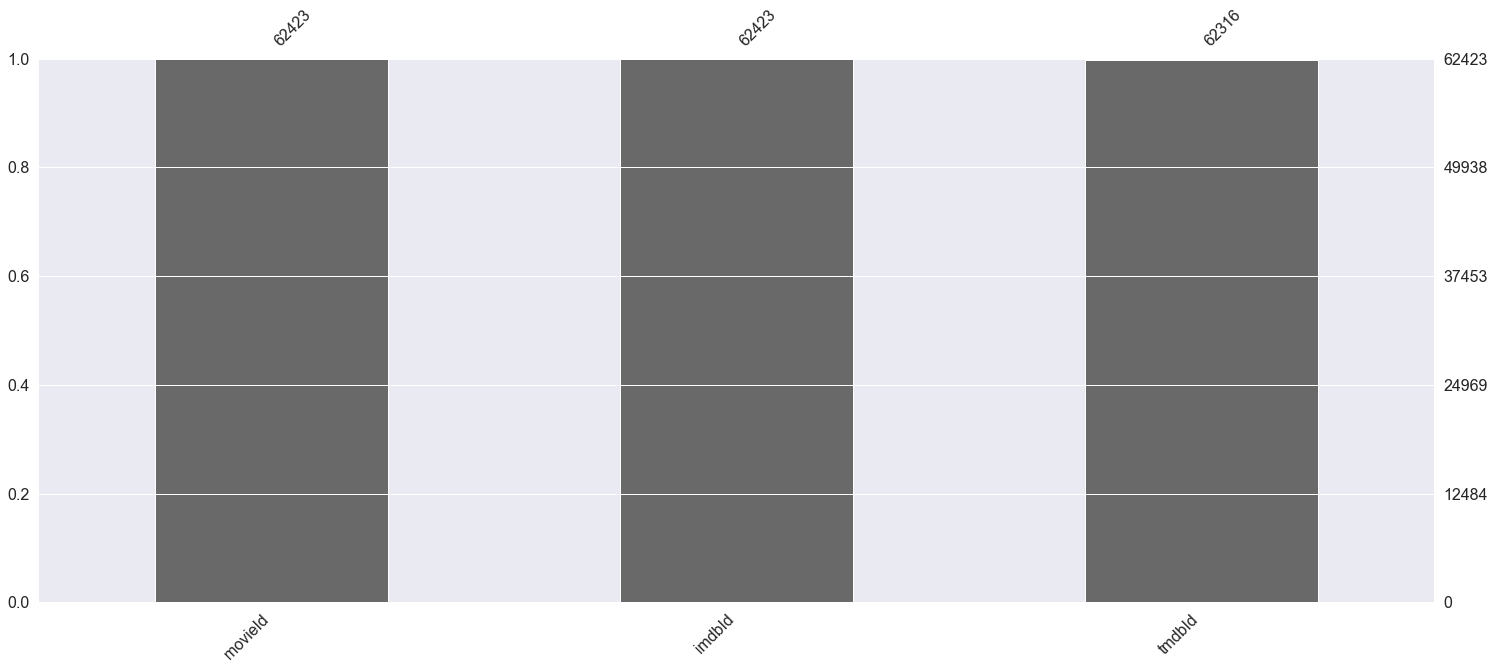

In [21]:
# plot bar chart of the missing values
msno.bar(links)

Only a slight fraction of data is missing in the 'tmdbId' column.

<AxesSubplot:>

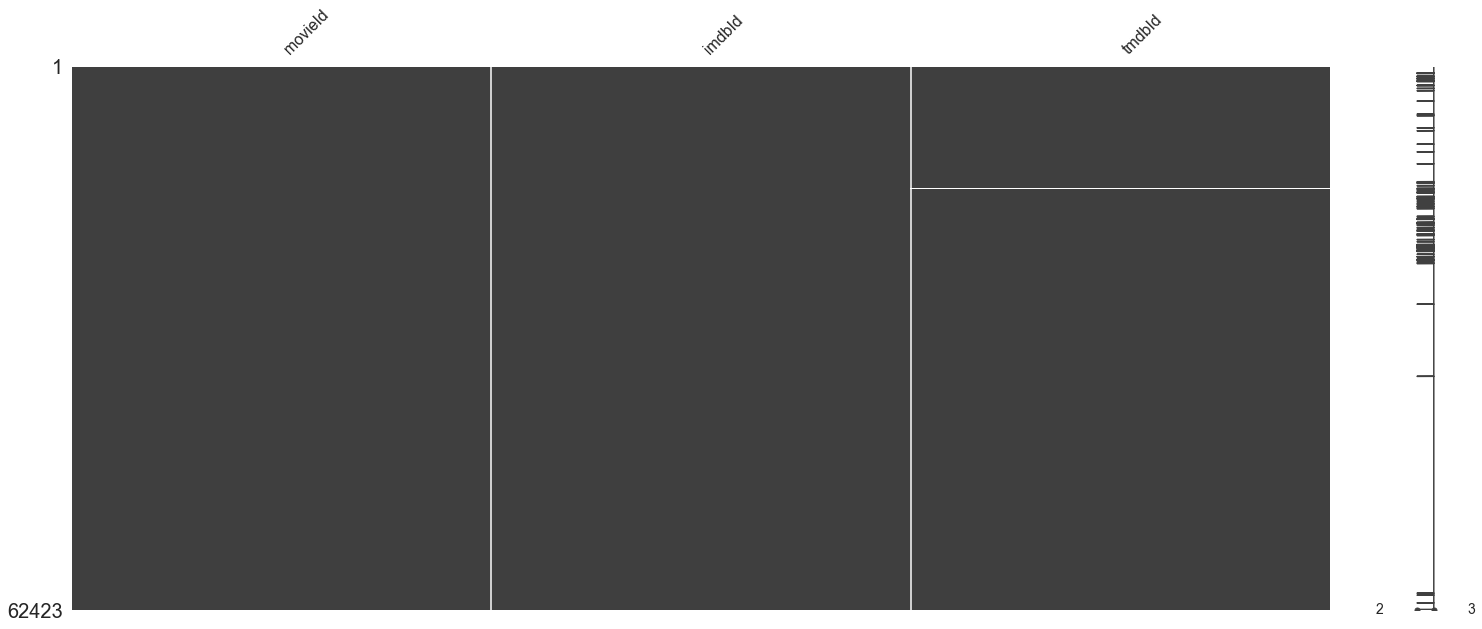

In [22]:
# plot a matrix of the missing data 
msno.matrix(links)

The matrix above shows us that there's only single small section in the whole 'tmdbId' column that has missing data. 

In [23]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
print('INFO OF DATASET')
movies.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
movies.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
    ----------------
MISSING VALUES OF DATASET


movieId    0
title      0
genres     0
dtype: int64

In [25]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [26]:
print('INFO OF DATASET')
tags.info()
print('    ----------------')
print('MISSING VALUES OF DATASET')
tags.isnull().sum()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
    ----------------
MISSING VALUES OF DATASET


userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Only 16 rows missing for the 'tag' column. For consistency's sake, let's give a visual representation of this below...

<AxesSubplot:>

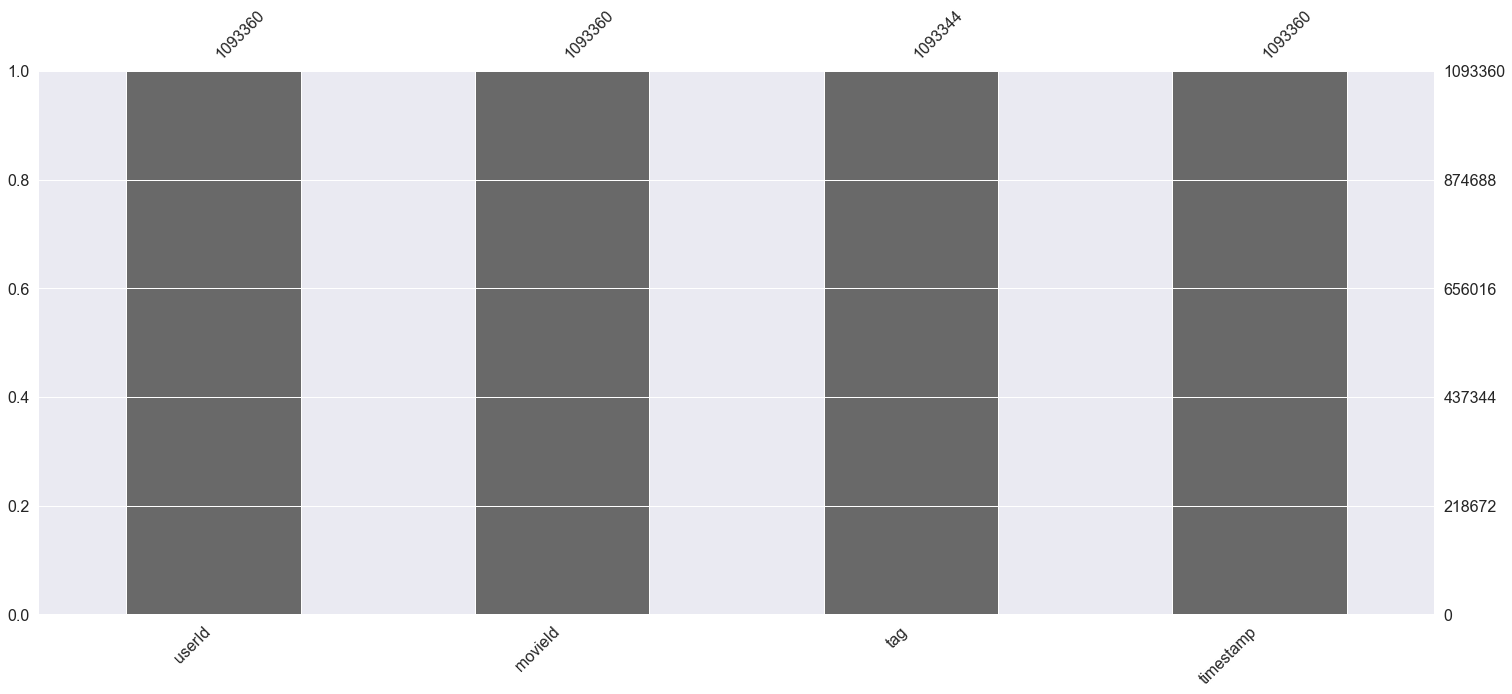

In [27]:
# plot bar chart of the missing values
msno.bar(tags)

As expected, the missing data represented visually is practically negligible (bar graph above). 

<AxesSubplot:>

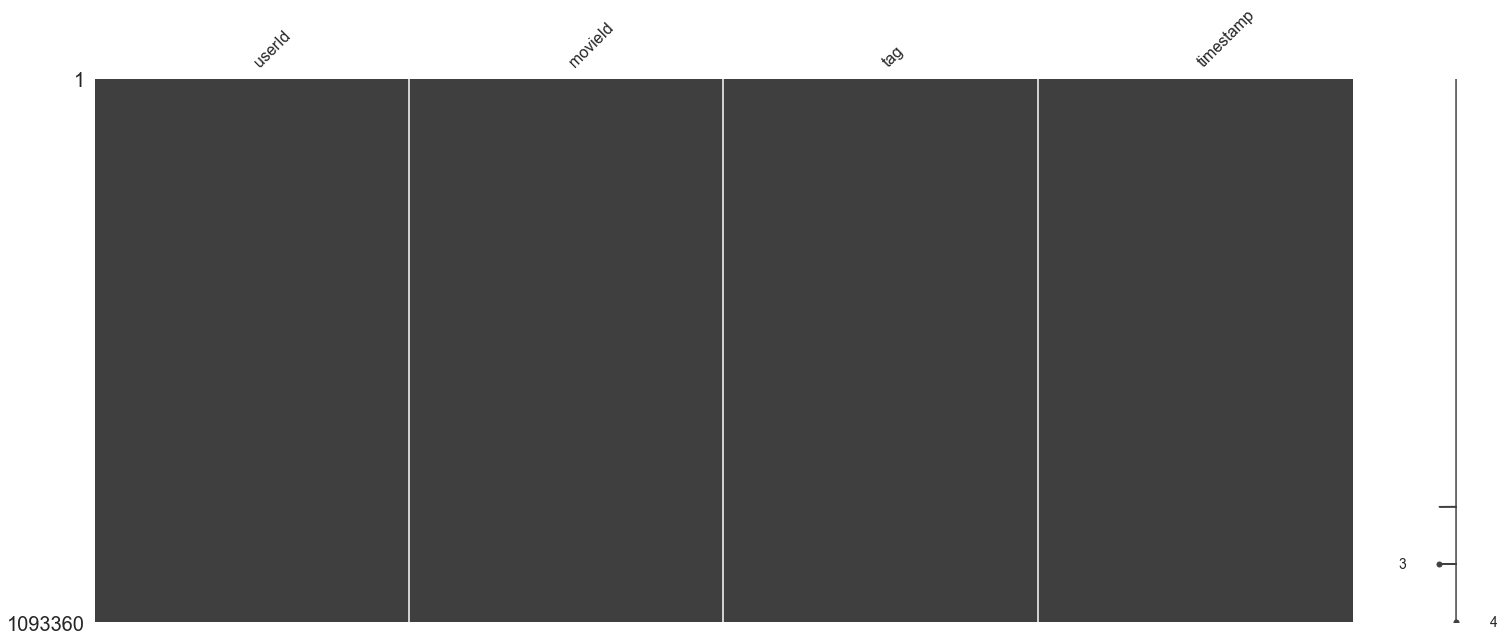

In [28]:
# plot a matrix of the missing data 
msno.matrix(tags)

The missing data is not even noticeable if we represent is via a matrix. Let's provide a summary of our findings of all dataframes below.

Upon investigation of missing values, we have found the following: 

* The links dataset has 107 missing values in the tmdb column. This makes up for a total of only 0.17% of missing data.
* The tags dataset has 16 missing values in the tag column. This makes up for a total of only 0.00015% of the missing data
*  The imdb_data dataset has a range of missing values - if need be, we'll address this issue at a later stage.

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section we create one or more models. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section we discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic